In [45]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

### Paso 1: Inspeccionamos el Dataset, para estudiar la mejor forma de cargarlo

In [3]:
with open('../Data/dataset_SCL.csv') as file:
    n_rows = len(file.readlines())
print (f'Numero de Filas: {n_rows}')

Numero de Filas: 68207


* Con 68 mil filas el dataset facilmente cabe directamente en memoria y no requiere de procesamiento adicional
* Se carga estandarizando las columnas con valores mixtos y fechas

In [4]:
data_vuelos = pd.read_csv('../Data/dataset_SCL.csv', dtype= {'Vlo-I':str, 'Vlo-O':str}, parse_dates=['Fecha-I', 'Fecha-O'])
matriz_vuelos = data_vuelos.copy()

In [5]:
matriz_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [6]:
for col in matriz_vuelos:
    print(f'Columna: {col}, Valores Unicos:{len(matriz_vuelos[col].unique())}')

Columna: Fecha-I, Valores Unicos:53252
Columna: Vlo-I, Valores Unicos:584
Columna: Ori-I, Valores Unicos:1
Columna: Des-I, Valores Unicos:64
Columna: Emp-I, Valores Unicos:30
Columna: Fecha-O, Valores Unicos:62774
Columna: Vlo-O, Valores Unicos:862
Columna: Ori-O, Valores Unicos:1
Columna: Des-O, Valores Unicos:63
Columna: Emp-O, Valores Unicos:32
Columna: DIA, Valores Unicos:31
Columna: MES, Valores Unicos:12
Columna: AÑO, Valores Unicos:2
Columna: DIANOM, Valores Unicos:7
Columna: TIPOVUELO, Valores Unicos:2
Columna: OPERA, Valores Unicos:23
Columna: SIGLAORI, Valores Unicos:1
Columna: SIGLADES, Valores Unicos:62


In [22]:
matriz_vuelos.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,00:03:00,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,00:09:00,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,00:09:00,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,00:03:00,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-1 days +23:58:00,0,noche


* Como toda la data es de tipo objeto (categorica), es realmente dificil realizar un analisis a priori a menos que se generen features que entreguen mas informacion al respecto de la pregunta de negocio en cuestion (atrasos), solo se pueden ver histogramas, rangos, aerolineas, y destinos (Origen es unico) 
* Las columnas de fecha estan con marca de tiempo por lo que es probable que existan muchos valores unicos

### Paso 2 : Analisis de distribucion simple

In [18]:
def simple_histogram(data:pd.DataFrame, column:str, enlarge:bool=False):
    if enlarge:
        plt.figure(figsize=(20,5))
    data[column].value_counts().plot.bar()

#### Aerolineas

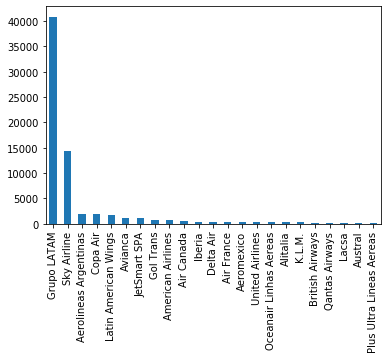

In [19]:
simple_histogram(matriz_vuelos, 'OPERA')

* Existen 2 Aerolineas sobrereprenentadas en el dataset; LATAM y Sky. Esto implica que el nombre del operador sera una feature complicada en analisis, por lo que se recomienda estratificarla o no usarla.

#### Destinos

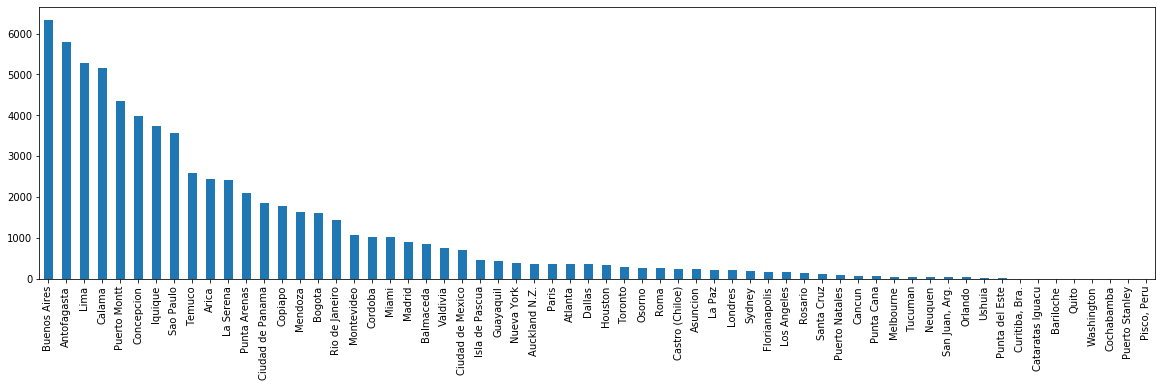

In [20]:
simple_histogram(matriz_vuelos, 'SIGLADES', enlarge=True)

* En caso de los destinos la data se encuentra un poco mejor distribuida, sin embargo, se descartaran aquellos destinos que tengan menos de 30 viajes por razones practicas y estadisticas.

* En general, la data no entrega muy buenas caracteristicas de aprendizaje para ser candidata a un modelo de ML, pudiera ser mas practico utilizar un modelo basado en reglas de negocio, o bien mejorar la calidad de la misma

#### Dias

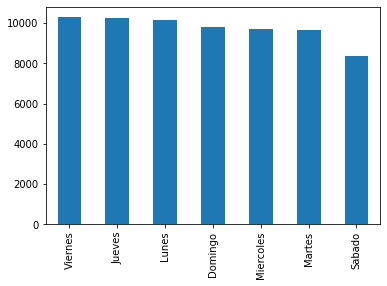

In [21]:
simple_histogram(matriz_vuelos, 'DIANOM')

* En general, la distribucion de vuelos por dia esta bastante normal, por lo que no se extraen mayores conclusiones

#### Tipos de Vuelo

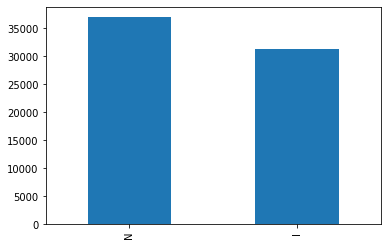

In [23]:
simple_histogram(matriz_vuelos, 'TIPOVUELO')

* Lo mismo con los tipos de vuelo. 

#### Mes

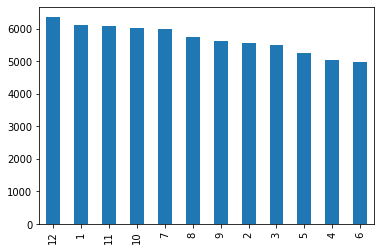

In [24]:
simple_histogram(matriz_vuelos, 'MES')

### Paso 3: Creacion de Features Adicionales

#### Temporada

In [10]:
t_alta1 = pd.date_range(start='01/01/2017', end='3/03/2017') 
t_alta2 = pd.date_range(start='07/15/2017', end='07/31/2017') 
t_alta3 = pd.date_range(start='9/11/2017', end='09/30/2017')
t_alta4 = pd.date_range(start='12/15/2017', end='01/01/2018')
t_alta = t_alta1.append([t_alta2, t_alta3, t_alta4])

In [11]:
matriz_vuelos['temporada_alta'] = pd.to_datetime(matriz_vuelos['Fecha-I']).apply(lambda x: 1 if x.strftime('%m/%d/%Y') in t_alta else 0)

#### Diferencia horaria en minutos

In [12]:
matriz_vuelos['dif_min']=matriz_vuelos['Fecha-O']-matriz_vuelos['Fecha-I']

#### Marcador de atraso 15 minutos

In [13]:
matriz_vuelos['atraso_15'] = matriz_vuelos['dif_min'].apply(lambda x: 1 if x>dt.timedelta(minutes=15) else 0)

#### Marcador Periodo del Dia

In [14]:
def periodo_dia(hora:int)->str:
    if(5<hora<12):
        return 'mañana'
    elif(12<hora<19):
        return 'tarde'
    elif(hora>19 or hora<5):
        return 'noche'

In [15]:
matriz_vuelos['periodo_dia']= matriz_vuelos['Fecha-I'].apply(lambda x: periodo_dia(x.hour))

In [16]:
matriz_vuelos.to_csv('../Data/synthetic_features.csv')

#### Analisis Resumido en Grafico Interactivo

In [69]:
meses = {index: month for index, month in enumerate(calendar.month_abbr) if month}
matriz_vuelos['TotalAerolinea'] = matriz_vuelos.groupby('OPERA')['Fecha-I'].transform(np.count_nonzero)
matriz_vuelos['Grupo'] = matriz_vuelos.apply(lambda x: x.OPERA if x.TotalAerolinea > 2500 else 'Otros', axis = 1)

In [70]:
matriz_vuelos['MESNOM'] = matriz_vuelos['MES'].apply(lambda x: meses[x])
fig = px.sunburst(matriz_vuelos, path=['Grupo','MESNOM', 'DIANOM', 'TIPOVUELO'], values='atraso_15')
fig.update_layout(
    grid= dict(columns=1, rows=1),
    margin = dict(t=0, l=0, r=0, b=0)
)
fig.show()

* Del grafico es sencillo desprender que la mayor cantidad de atrasos para LATAM ocurre en Vuelos Nacionales Durante el Mes de Julio, Principalmente en Lunes y Martes
* En el caso de Sky, en Diciembre, para vuelos Nacionales, principalmente en Lunes, Jueves y Viernes.
* Para otras aerolineas, el patron es relativamente estandar, considerando que principalmente manejan vuelos internacionales. 

### Paso 4: Analisis de Correlacion y Agrupaciones

#### Generacion 2 Features adicionales para mejorar el analisis: Diferencia en Planificacion-Operacion, y % Retraso por Clasificacion (Aerolinea y Tipo de Vuelo)

##### Hipotesis adicionales: 
* Existe una relacion entre una discordancia en los origenes/destinos y atrasos?

### Paso 5 Modelado base

### Paso 6: Monitoreo y recomendacion

### Conclusion